In [2]:
!pip install pandas_profiling

You should consider upgrading via the 'c:\users\18202\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling

In [4]:
import folium
from folium import plugins

In [5]:
crime = pd.read_csv('crime.csv')
district = pd.read_csv('district_mapping.csv')

C:\Users\18202\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,3/10/2018 20:13,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,30/08/2018 20:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,3/10/2018 19:20,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,3/10/2018 20:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,3/10/2018 20:49,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [7]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327820 entries, 0 to 327819
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      327820 non-null  object 
 1   OFFENSE_CODE         327820 non-null  int64  
 2   OFFENSE_CODE_GROUP   327820 non-null  object 
 3   OFFENSE_DESCRIPTION  327820 non-null  object 
 4   DISTRICT             326046 non-null  object 
 5   REPORTING_AREA       327820 non-null  object 
 6   SHOOTING             1055 non-null    object 
 7   OCCURRED_ON_DATE     327820 non-null  object 
 8   YEAR                 327820 non-null  int64  
 9   MONTH                327820 non-null  int64  
 10  DAY_OF_WEEK          327820 non-null  object 
 11  HOUR                 327820 non-null  int64  
 12  UCR_PART             327727 non-null  object 
 13  STREET               316843 non-null  object 
 14  Lat                  307188 non-null  float64
 15  Long             

In [8]:
crime.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,327820.000000,327820.000000,327820.000000,327820.000000,307188.000000,307188.000000
mean,2317.961171,2016.598676,6.672213,13.114840,42.212995,-70.906030
std,1184.990073,1.009775,3.253984,6.292714,2.173496,3.515832
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297466,-71.097081
50%,2907.000000,2017.000000,7.000000,14.000000,42.325552,-71.077493
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062482
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [9]:
crime['OCCURRED_ON_DATE'] = pd.to_datetime(crime['OCCURRED_ON_DATE'])

In [10]:
crime_new = pd.merge(crime, district, on = 'DISTRICT')

In [11]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327820 entries, 0 to 327819
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      327820 non-null  object        
 1   OFFENSE_CODE         327820 non-null  int64         
 2   OFFENSE_CODE_GROUP   327820 non-null  object        
 3   OFFENSE_DESCRIPTION  327820 non-null  object        
 4   DISTRICT             326046 non-null  object        
 5   REPORTING_AREA       327820 non-null  object        
 6   SHOOTING             1055 non-null    object        
 7   OCCURRED_ON_DATE     327820 non-null  datetime64[ns]
 8   YEAR                 327820 non-null  int64         
 9   MONTH                327820 non-null  int64         
 10  DAY_OF_WEEK          327820 non-null  object        
 11  HOUR                 327820 non-null  int64         
 12  UCR_PART             327727 non-null  object        
 13  STREET        

In [12]:
crime_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326046 entries, 0 to 326045
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      326046 non-null  object        
 1   OFFENSE_CODE         326046 non-null  int64         
 2   OFFENSE_CODE_GROUP   326046 non-null  object        
 3   OFFENSE_DESCRIPTION  326046 non-null  object        
 4   DISTRICT             326046 non-null  object        
 5   REPORTING_AREA       326046 non-null  object        
 6   SHOOTING             1053 non-null    object        
 7   OCCURRED_ON_DATE     326046 non-null  datetime64[ns]
 8   YEAR                 326046 non-null  int64         
 9   MONTH                326046 non-null  int64         
 10  DAY_OF_WEEK          326046 non-null  object        
 11  HOUR                 326046 non-null  int64         
 12  UCR_PART             325953 non-null  object        
 13  STREET        

In [13]:
crime.shape

(327820, 17)

In [14]:
crime_new.shape

(326046, 18)

In [15]:
crime_new = pd.merge(crime, district, on = 'DISTRICT', how = "left")

In [16]:
crime_new.shape

(327820, 18)

In [17]:
print(crime.shape)
print(crime_new.shape)

(327820, 17)
(327820, 18)


In [18]:
crime_new['SHOOTING'] = crime_new['SHOOTING'].fillna(value='N')

In [19]:
crime_new['SHOOTING'].unique()

array(['N', 'Y'], dtype=object)

In [20]:
# pandas_profiling.ProfileReport(crime_new)  - data profiling

In [21]:
crime_new[crime_new.duplicated(subset=None, keep= False)]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,DISTRICT_NAME
327487,I152030570-00,3125,Warrant Arrests,WARRANT ARREST,E13,303,N,2016-10-29 08:25:00,2016,10,Saturday,8,Part Three,W WALNUT PARK,42.317207,-71.098799,"(42.31720702, -71.09879922)",Jamaica Plain
327490,I152030570-00,3125,Warrant Arrests,WARRANT ARREST,E13,303,N,2016-10-29 08:25:00,2016,10,Saturday,8,Part Three,W WALNUT PARK,42.317207,-71.098799,"(42.31720702, -71.09879922)",Jamaica Plain
327496,I152026775-00,3115,Investigate Person,INVESTIGATE PERSON,C6,936,N,2015-10-19 16:04:00,2015,10,Monday,16,Part Three,ORTON-MAROTTA WAY,42.338573,-71.055755,"(42.33857289, -71.05575501)",South Boston
327497,I152026775-00,3115,Investigate Person,INVESTIGATE PERSON,C6,936,N,2015-10-19 16:04:00,2015,10,Monday,16,Part Three,ORTON-MAROTTA WAY,42.338573,-71.055755,"(42.33857289, -71.05575501)",South Boston
327499,I152026488-00,3125,Warrant Arrests,WARRANT ARREST,A1,105,N,2017-01-31 10:00:00,2017,1,Tuesday,10,Part Three,FRUIT ST,42.362403,-71.069547,"(42.36240281, -71.06954652)",Downtown
327500,I152026488-00,3125,Warrant Arrests,WARRANT ARREST,A1,105,N,2017-01-31 10:00:00,2017,1,Tuesday,10,Part Three,FRUIT ST,42.362403,-71.069547,"(42.36240281, -71.06954652)",Downtown
327524,I152006153-00,1849,Drug Violation,"DRUGS - POSS CLASS B - COCAINE, ETC.",C6,179,N,2015-09-16 11:30:00,2015,9,Wednesday,11,Part Two,MASSACHUSETTS AVE,42.332531,-71.072130,"(42.33253100, -71.07213000)",South Boston
327526,I152006153-00,1849,Drug Violation,"DRUGS - POSS CLASS B - COCAINE, ETC.",C6,179,N,2015-09-16 11:30:00,2015,9,Wednesday,11,Part Two,MASSACHUSETTS AVE,42.332531,-71.072130,"(42.33253100, -71.07213000)",South Boston
327529,I152004688-00,3125,Warrant Arrests,WARRANT ARREST,A1,120,N,2016-07-19 12:50:00,2016,7,Tuesday,12,Part Three,BOYLSTON ST,42.352418,-71.065255,"(42.35241815, -71.06525499)",Downtown
327530,I152004688-00,3125,Warrant Arrests,WARRANT ARREST,A1,120,N,2016-07-19 12:50:00,2016,7,Tuesday,12,Part Three,BOYLSTON ST,42.352418,-71.065255,"(42.35241815, -71.06525499)",Downtown


In [22]:
crime_new = crime_new.drop_duplicates(keep='first')

In [23]:
crime_new.shape

(327797, 18)

In [24]:
crime_new['DISTRICT_NAME'].value_counts()

Roxbury          51283
Dorchester       43815
South End        43337
Downtown         36728
Mattapan         36399
South Boston     24187
Brighton         20632
Jamaica Plain    17979
Hyde Park        17824
East Boston      13634
Centre Street    13542
Charlestown       6663
Name: DISTRICT_NAME, dtype: int64

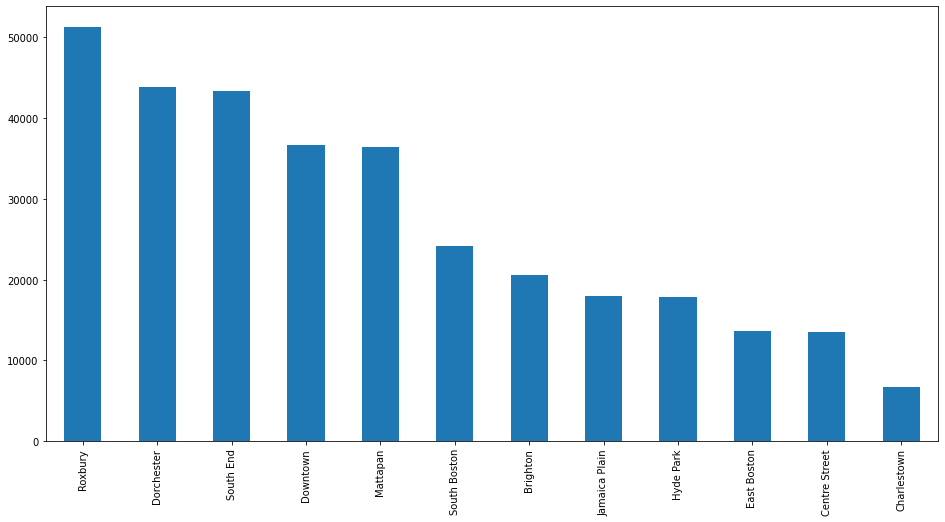

In [25]:
plt.figure(figsize=(16,8))
crime_new['DISTRICT_NAME'].value_counts().plot.bar()
plt.show()

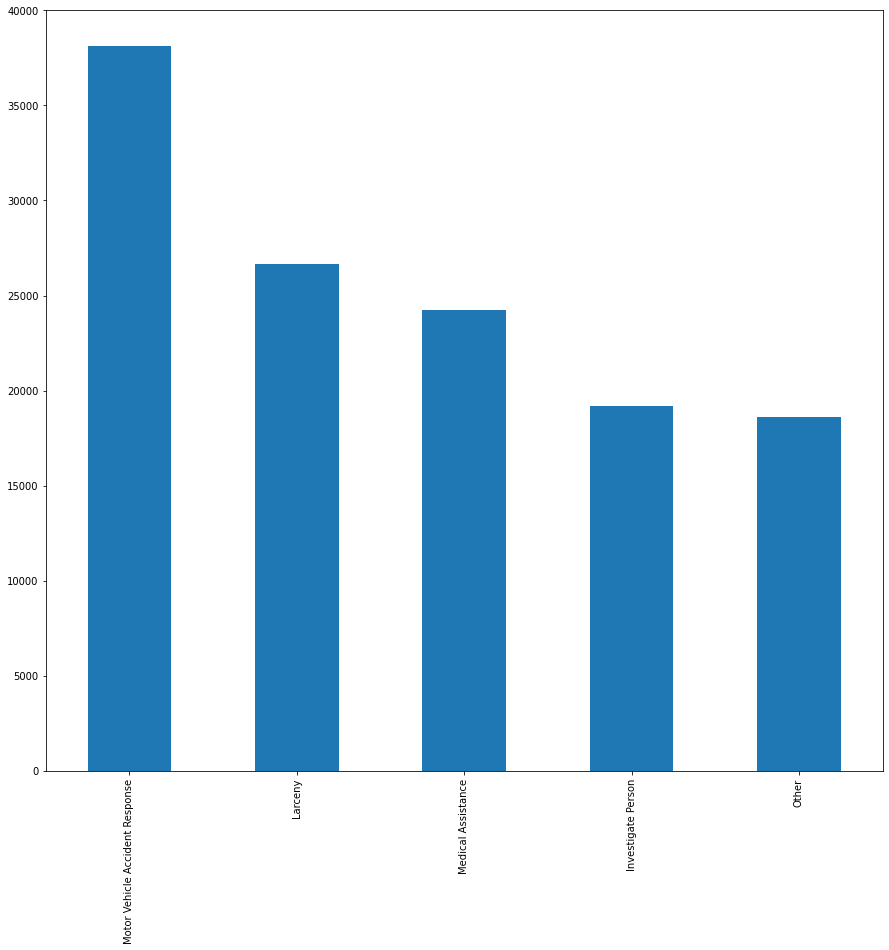

In [26]:
plt.figure(figsize=(15,14))
crime_new['OFFENSE_CODE_GROUP'].value_counts().head(5).plot.bar()

<BarContainer object of 5 artists>

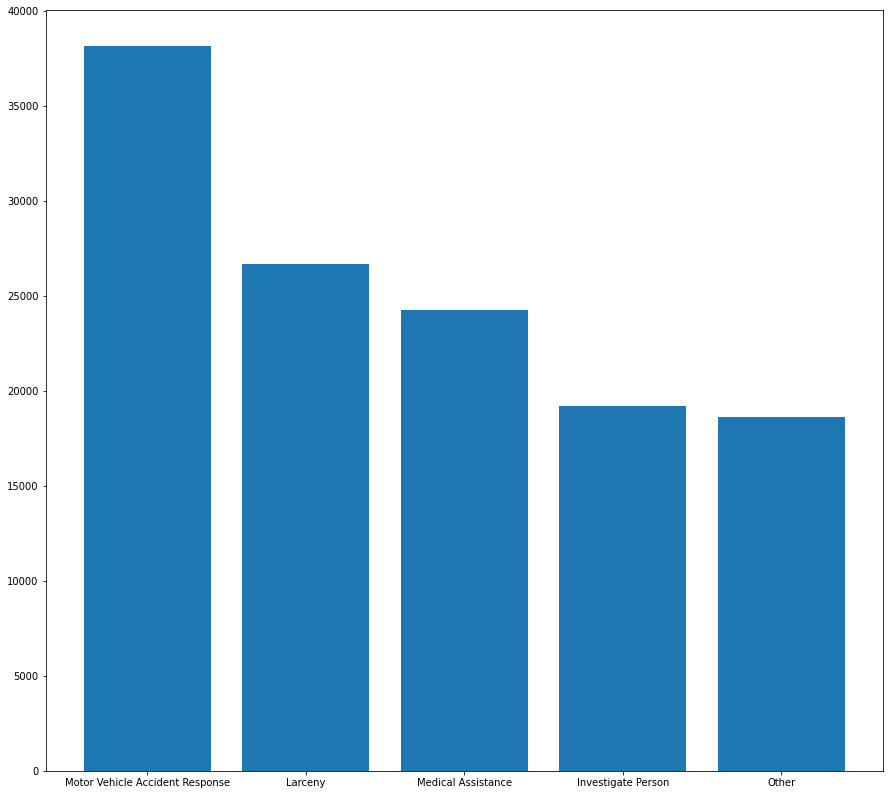

In [27]:
offense_code_group = crime_new['OFFENSE_CODE_GROUP'].value_counts().reset_index()
plt.figure(figsize=(15,14))
plt.bar(offense_code_group['index'][0:5],offense_code_group['OFFENSE_CODE_GROUP'][0:5])

C:\Users\18202\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


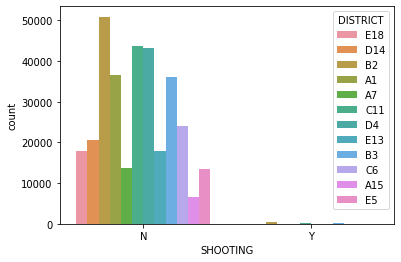

In [28]:
sns.countplot('SHOOTING', hue='DISTRICT', data=crime_new)

C:\Users\18202\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


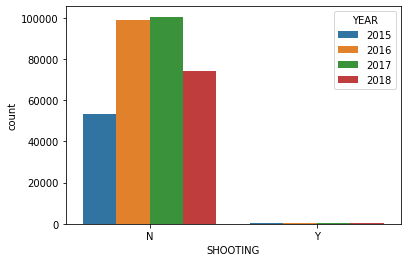

In [29]:
sns.countplot("SHOOTING", hue="YEAR", data=crime_new)

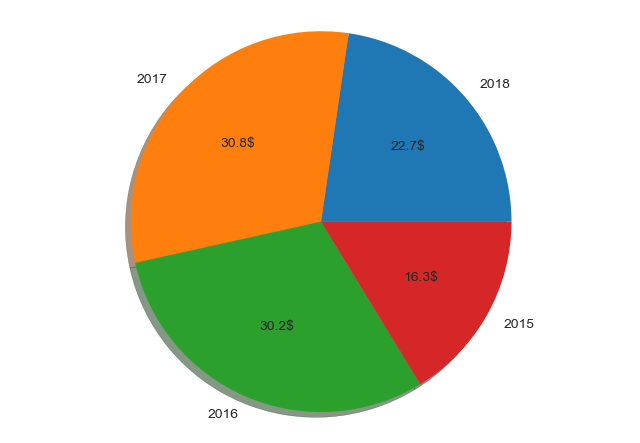

In [53]:
labels = crime_new['YEAR'].unique().tolist()
counts = crime_new['YEAR'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f$',shadow=True)
ax1.axis('equal')
plt.show()

C:\Users\18202\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


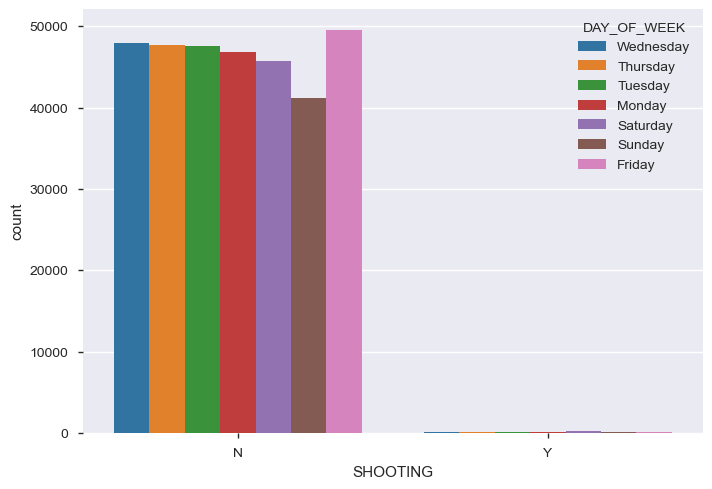

In [54]:
sns.countplot("SHOOTING", hue="DAY_OF_WEEK", data=crime_new)

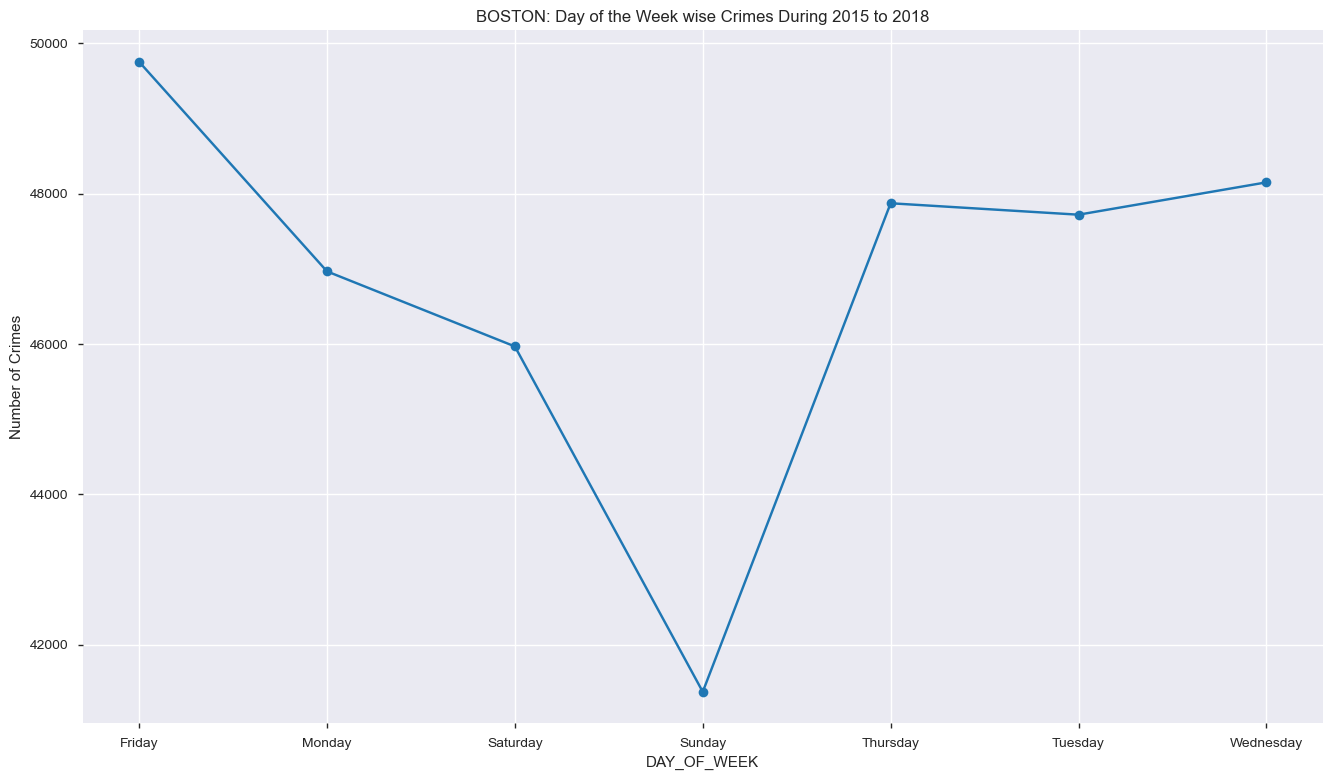

In [56]:
plt.figure(figsize=(16,9))
crime_new.groupby('DAY_OF_WEEK')['INCIDENT_NUMBER'].count().plot(marker = 'o')
plt.ylabel('Number of Crimes')
plt.title('BOSTON: Day of the Week wise Crimes During 2015 to 2018')
plt.show()

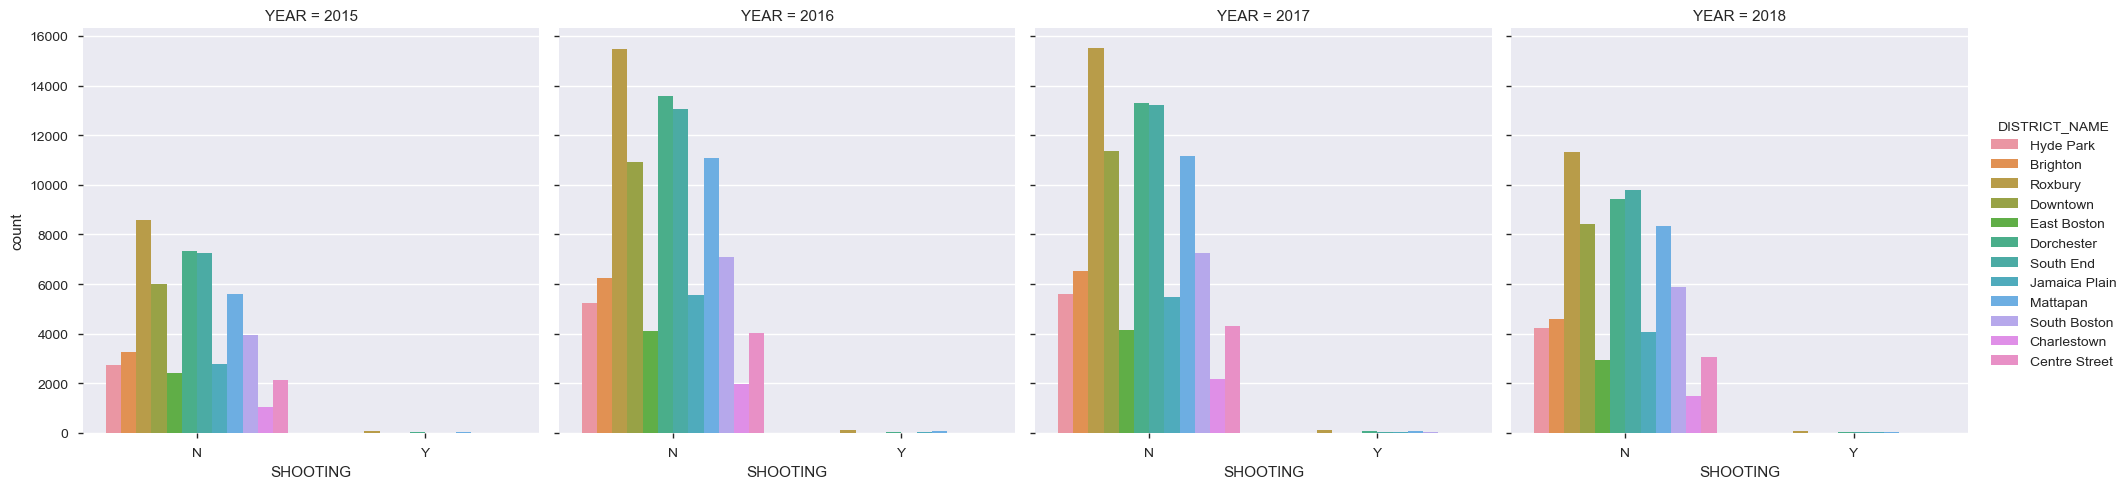

In [57]:
sns.catplot(x="SHOOTING",
           hue="DISTRICT_NAME",
           col="YEAR",
           data=crime_new,
           kind="count")

In [30]:
mapping=folium.Map([42.262607, -71.121186],zoomstart=11)
mapping

In [31]:
streetMap=crime_new[['Lat','Long']][crime_new['SHOOTING']=='Y']
streetMap=streetMap.replace(np.nan,0)
streetMap=streetMap.values
mapping.add_child(plugins.HeatMap(streetMap,radius=15))
mapping